In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


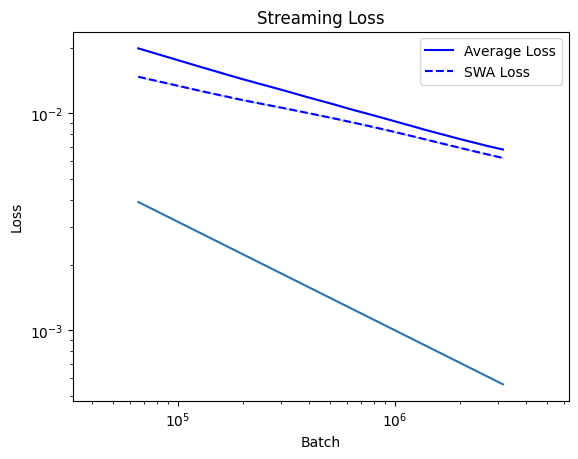

In [17]:

# Read the loss data

input_dim = 64
hidden_dims_model = [256, 256]
output_dims = 2
hidden_dims_agent = [1024]
# seeds = [(42, 44), (42, 45), (42, 46), (42, 47)]
optim = 'sgd'
seeds = [(43, 44)]

batch_data = []
datas = []
swa_datas = []
for hidden_dim in hidden_dims_agent:
    loss_per_hidden_dim = []
    swa_loss_per_hidden_dim = []
    batch_per_hidden_dim = []
    min_size = 10e10
    for (data_seed, agent_seed) in seeds:
        if optim == 'sgd':
            filename = f"logs/sgd/training_loss_in{input_dim}_hid{hidden_dims_model[0]}_out{output_dims}_hid{hidden_dim}_data_seed{data_seed}_agent_seed{agent_seed}_swa.log"
        else:
            filename = f"logs/training_loss_in{input_dim}_hid{hidden_dims_model[0]}_out{output_dims}_hid{hidden_dim}_data_seed{data_seed}_agent_seed{agent_seed}_swa.log"
        loss_data = pd.read_csv(filename, header='infer', dtype=float)
        loss_per_hidden_dim.append(loss_data['loss'])
        batch_per_hidden_dim.append(loss_data['batch'])
        min_size = min(min_size, len(loss_data))
        swa_loss_per_hidden_dim.append(loss_data['swa_loss'])
    loss_per_hidden_dim = np.array([loss[:min_size] for loss in loss_per_hidden_dim])
    swa_loss_per_hidden_dim = np.array([loss[:min_size] for loss in swa_loss_per_hidden_dim])
    batch_per_hidden_dim = np.array([batch[:min_size] for batch in batch_per_hidden_dim])
    datas.append(loss_per_hidden_dim)
    swa_datas.append(swa_loss_per_hidden_dim)
    batch_data.append(batch_per_hidden_dim)

# Plot both losses
for i in range(len(batch_data)):
    plt.plot(batch_data[i][0], np.mean(datas[i], axis=0), label='Average Loss', linestyle='-', color='b')
    plt.plot(batch_data[i][0], np.mean(swa_datas[i], axis=0), label='SWA Loss', linestyle='--', color='b')
    plt.fill_between(batch_data[i][0], np.min(datas[i], axis=0), np.max(datas[i], axis=0), alpha=0.2, color='b')
    plt.fill_between(batch_data[i][0], np.min(swa_datas[i], axis=0), np.max(swa_datas[i], axis=0), alpha=0.2, color='b')

plt.xlabel('Batch')
plt.ylabel('Loss')
plt.title('Streaming Loss')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.axis('equal')

x = loss_data['batch']
plt.plot(x, 1/np.sqrt(x))
plt.show()

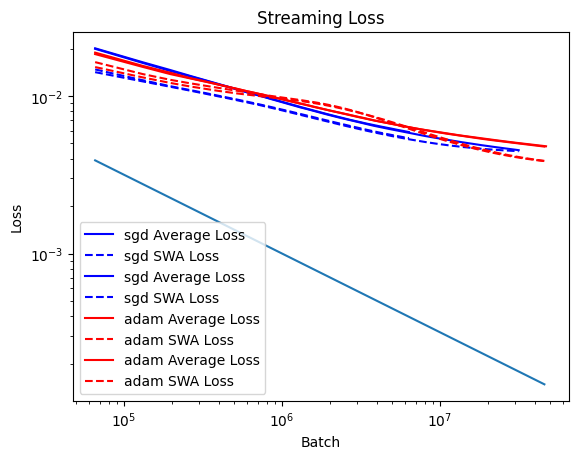

In [ ]:

# Read the loss data

input_dim = 64
hidden_dims_model = [128]
output_dims = 2
hidden_dims_agent = [512]
# seeds = [(42, 44), (42, 45), (42, 46), (42, 47)]
seeds = [(43, 44, 'adam')]

batch_data = []
datas = []
swa_datas = []
optims = []
for (data_seed, agent_seed, optim) in seeds:
    if optim == 'sgd':
        filename = f"logs/sgd/training_loss_in{input_dim}_hid{hidden_dims_model[0]}_out{output_dims}_hid{hidden_dim}_data_seed{data_seed}_agent_seed{agent_seed}_swa.log"
    else:
        filename = f"logs/adam/training_loss_in{input_dim}_hid{hidden_dims_model[0]}_out{output_dims}_hid{hidden_dim}_data_seed{data_seed}_agent_seed{agent_seed}_swa.log"
    loss_data = pd.read_csv(filename, header='infer', dtype=float)
    datas.append(loss_data['loss'])
    batch_data.append(loss_data['batch'])
    swa_datas.append(loss_data['swa_loss'])
    optims.append(optim)

# Plot both losses
for i in range(len(batch_data)):
    if optims[i] == 'sgd':
        plt.plot(batch_data[i], datas[i], label=f'{optims[i]} Average Loss', linestyle='-', color='b')
        plt.plot(batch_data[i], swa_datas[i], label=f'{optims[i]} SWA Loss', linestyle='--', color='b')
    else:
        plt.plot(batch_data[i], datas[i], label=f'{optims[i]} Average Loss', linestyle='-', color='r')
        plt.plot(batch_data[i], swa_datas[i], label=f'{optims[i]} SWA Loss', linestyle='--', color='r')

plt.xlabel('Batch')
plt.ylabel('Loss')
plt.title('Streaming Loss')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.axis('equal')

x = loss_data['batch']
plt.plot(x, 1/np.sqrt(x))
plt.show()